[1 1 0 ... 2 2 2]


Text(0.5, 1.0, '9 clusters')

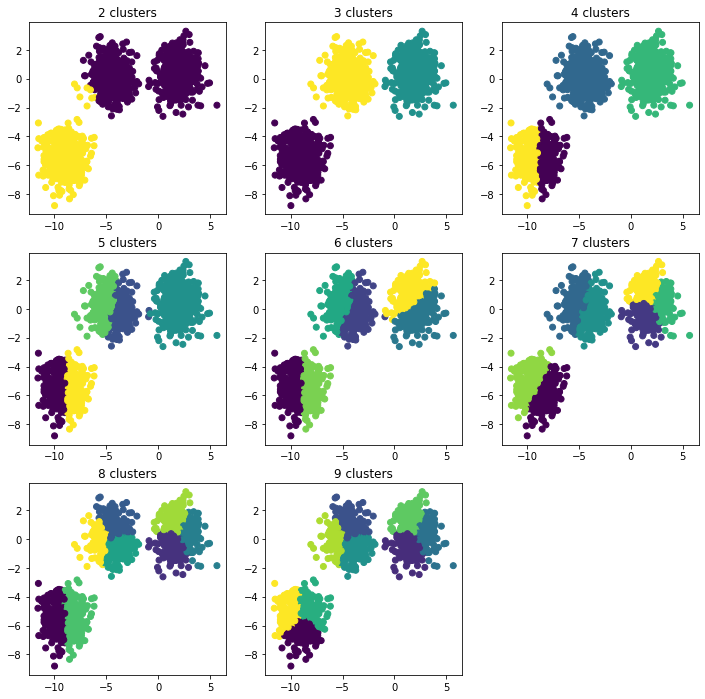

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.subplot(331)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('2 clusters')

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.subplot(332)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('3 clusters')

y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
plt.subplot(333)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('4 clusters')

y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X)
plt.subplot(334)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('5 clusters')

y_pred = KMeans(n_clusters=6, random_state=random_state).fit_predict(X)
plt.subplot(335)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('6 clusters')

y_pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(X)
plt.subplot(336)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('7 clusters')

y_pred = KMeans(n_clusters=8, random_state=random_state).fit_predict(X)
plt.subplot(337)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('8 clusters')

y_pred = KMeans(n_clusters=9, random_state=random_state).fit_predict(X)
plt.subplot(338)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('9 clusters')





Text(0.5, 1.0, 'Elbow curve')

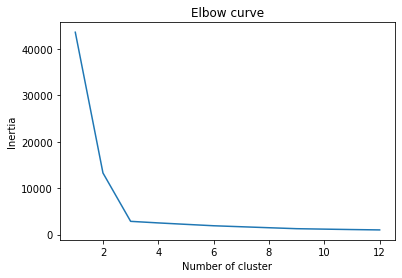

In [46]:
inertia = []
for c in range(1,13):
    kmeans = KMeans(n_clusters=c, random_state=random_state).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,13),inertia)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Elbow curve')



In [ ]:
# the optimal number of cluster is 3 which is same as my expectation.

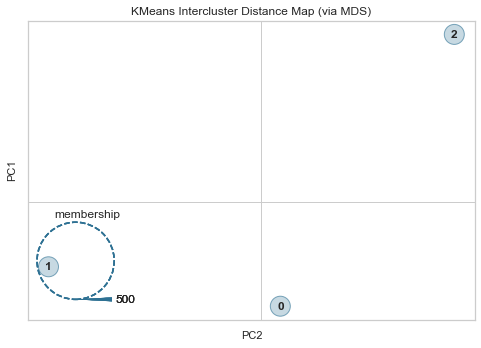

In [49]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(3)
visualizer = InterclusterDistance(model)
visualizer.fit(X)       
visualizer.show()

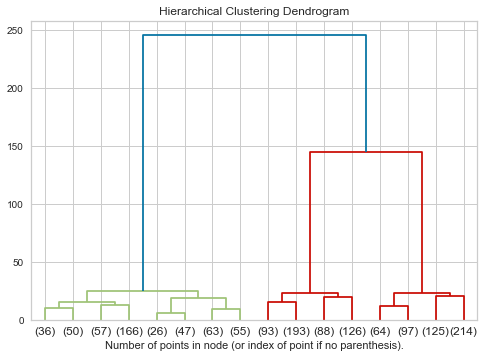

In [50]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# I should cut the dendrogram at the level of "25" which only has three leaves(nodes).